In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
entrenamiento = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [3]:
regiones = entrenamiento.pivot_table(index = ['Region'], columns = 'Stage', aggfunc = 'size', fill_value = 0)

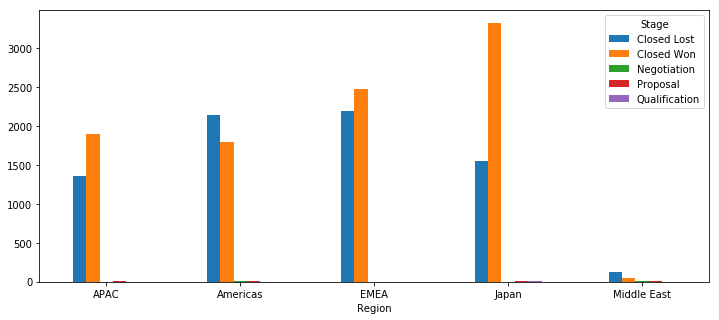

In [4]:
regiones.plot.bar(rot = 0, figsize = (12,5))

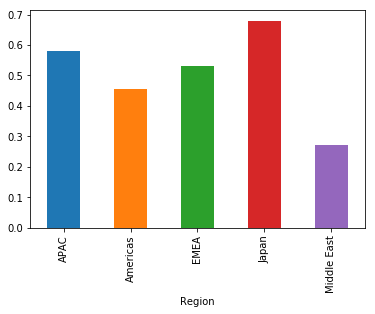

In [5]:
regiones['porcentaje_won'] = regiones['Closed Won']/regiones.sum(axis=1)
regiones['porcentaje_won'].plot.bar()

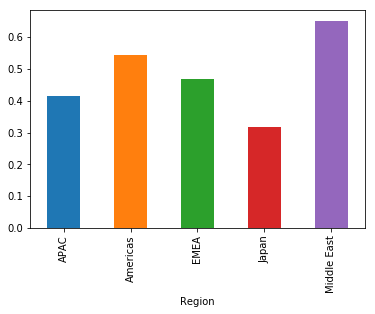

In [6]:
regiones['porcentaje_lost'] = regiones['Closed Lost']/regiones.sum(axis=1)
regiones['porcentaje_lost'].plot.bar()

In [8]:
anios = entrenamiento.pivot_table(
    index = ['Delivery_Year'], columns = 'Stage',
    aggfunc = 'size', fill_value = 0)

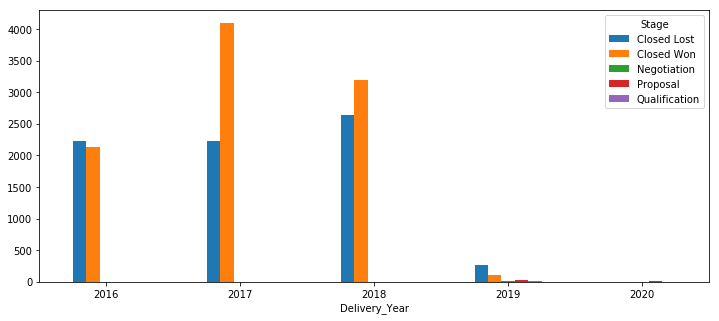

In [9]:
anios.plot.bar(rot = 0, figsize = (12,5))

In [28]:
trf = entrenamiento.pivot_table(
    index = ['TRF'], columns = 'Stage',
    aggfunc = 'size', fill_value = 0)

In [42]:
trf.sum(axis = 1).sort_values(ascending = False).head(10)

TRF
0     11971
1      2192
2       627
3       354
5       297
4       208
10      190
6       131
7       111
20       83
dtype: int64

In [51]:
tipos_aprobaciones = entrenamiento.pivot_table(
    index = ['Bureaucratic_Code'], columns = 'Stage',
    aggfunc = 'size', fill_value = 0)

In [52]:
tipos_aprobaciones.head()

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Bureaucratic_Code,,,,,
Bureaucratic_Code_0,0,51,0,0,0
Bureaucratic_Code_1,159,102,0,0,0
Bureaucratic_Code_2,128,114,0,0,0
Bureaucratic_Code_3,1,1,0,0,0
Bureaucratic_Code_4,4291,8253,17,26,0


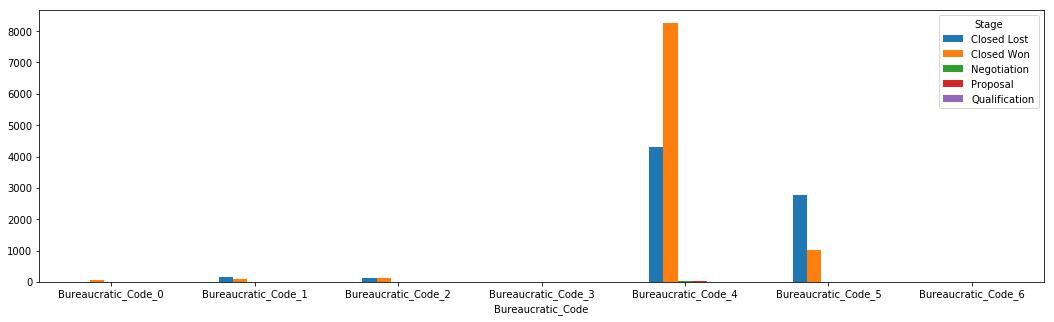

In [54]:
tipos_aprobaciones.plot.bar(rot = 0, figsize = (18,5))